In [98]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /home/charlotteknight/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [99]:
import pandas as pd
df = pd.read_csv(path + "/creditcard.csv")
print(df.columns)
print(df)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.

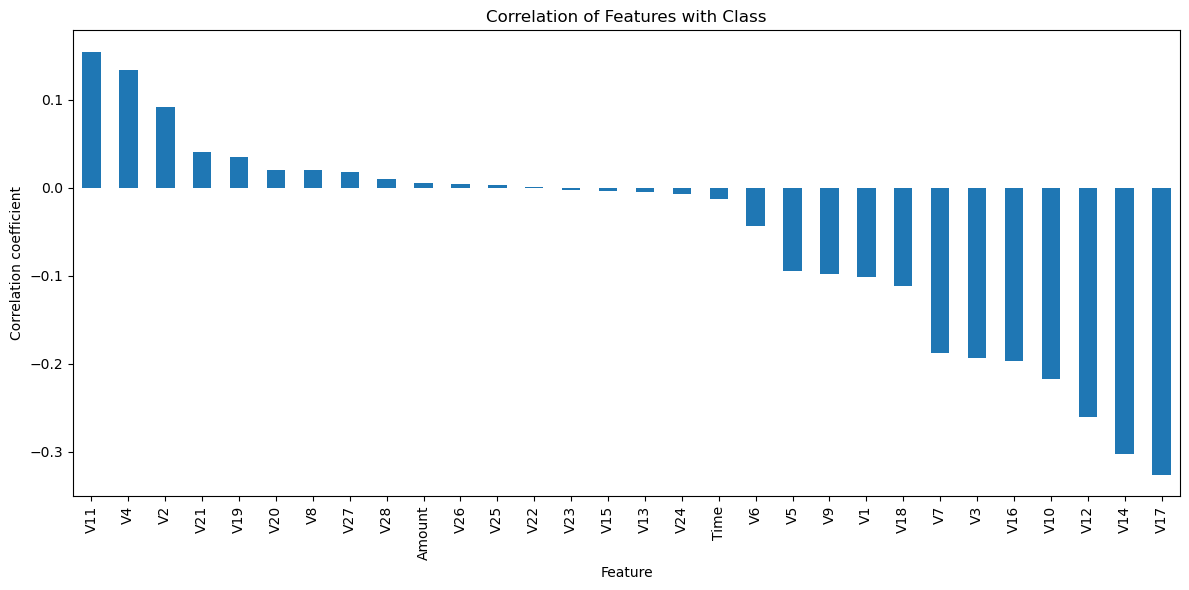

In [100]:
import matplotlib.pyplot as plt

# Compute correlation of each feature with the target 'Class'
corr = df.corr()['Class'].drop('Class')

# Plot
plt.figure(figsize=(12, 6))
corr.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Class')
plt.ylabel('Correlation coefficient')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

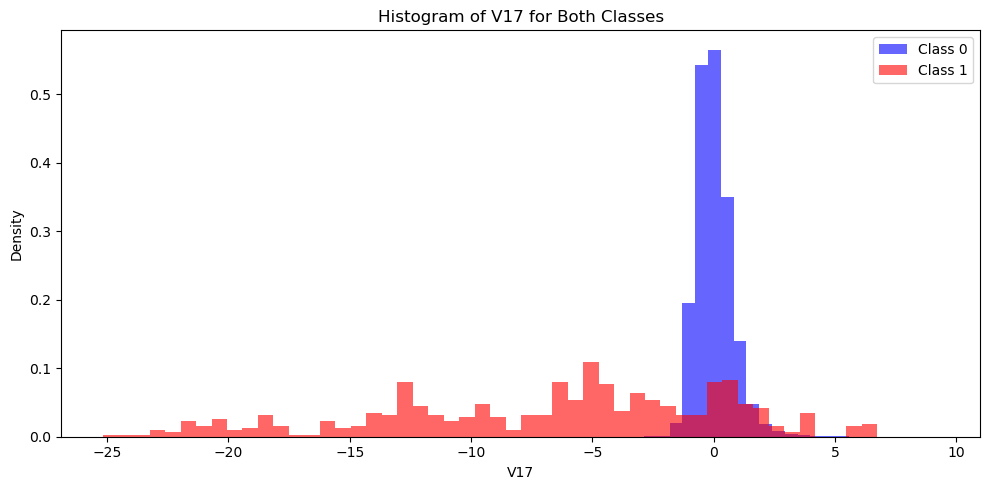

In [101]:
plt.figure(figsize=(10, 5))
plt.hist(df[df['Class'] == 0]['V17'], bins=50, alpha=0.6, label='Class 0', color='blue', density=True)
plt.hist(df[df['Class'] == 1]['V17'], bins=50, alpha=0.6, label='Class 1', color='red', density=True)
plt.xlabel('V17')
plt.ylabel('Density')
plt.title('Histogram of V17 for Both Classes')
plt.legend()
plt.tight_layout()
plt.show()

In [102]:
# Stratified sampling: sample 50% from each class separately

print(df['Class'].value_counts())

df_train = df.groupby('Class').sample(frac=0.5, random_state=42)
df_test = df.drop(df_train.index)

print(df_train['Class'].value_counts())
print(df_test['Class'].value_counts())

X_train = df_train.drop(columns=['Class'])
y_train = df_train['Class']

X_test = df_test.drop(columns=['Class'])
y_test = df_test['Class']

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    142158
1       246
Name: count, dtype: int64
Class
0    142157
1       246
Name: count, dtype: int64


In [103]:
print(X_train)
print(X_train.columns)

            Time        V1        V2        V3        V4        V5        V6  \
138028   82450.0  1.314539  0.590643 -0.666593  0.716564  0.301978 -1.125467   
63099    50554.0 -0.798672  1.185093  0.904547  0.694584  0.219041 -0.319295   
73411    55125.0 -0.391128 -0.245540  1.122074 -1.308725 -0.639891  0.008678   
164247  116572.0 -0.060302  1.065093 -0.987421 -0.029567  0.176376 -1.348539   
148999   90434.0  1.848433  0.373364  0.269272  3.866438  0.088062  0.970447   
...          ...       ...       ...       ...       ...       ...       ...   
6336      7543.0  0.329594  3.712889 -5.775935  6.078266  1.667359 -2.420168   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
52521    45501.0  1.001992  0.047938 -0.349002  1.493958  0.186939  0.190966   
108258   70828.0  0.196707  1.189757  0.704882  2.891388  0.045555  1.245730   
74507    55618.0 -7.427924  2.948209 -8.678550  5.185303 -4.761090 -0.957095   

              V7        V8        V9  .

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(eval_metric="auc", 
                          scale_pos_weight=sum(y_train == 0) / sum(y_train == 1))
print(model.get_params())
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
print(model.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': 5, 'enable_categorical': False, 'eval_metric': 'auc', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 577.8780487804878, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
[0]	validation_0-auc:0.95938
[1]	validation_0-auc:0.94409
[2]	va

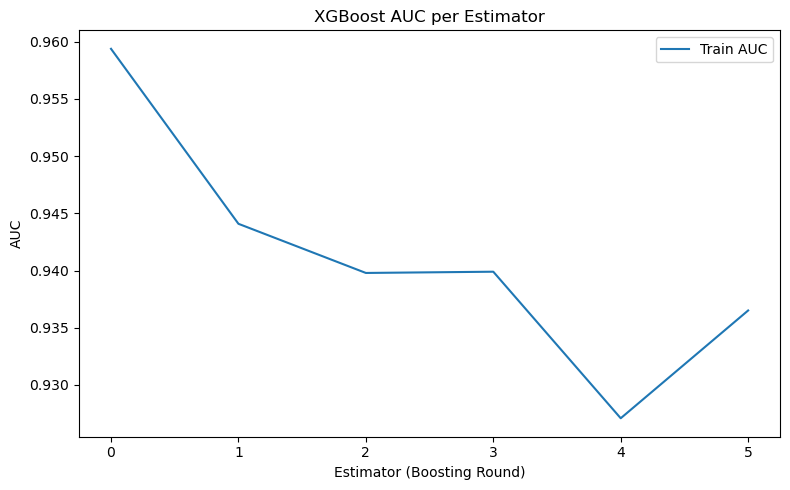

In [105]:
results = model.evals_result() if hasattr(model, "evals_result") else None

if results and "validation_0" in results and "auc" in results["validation_0"]:
  aucs = results["validation_0"]["auc"]
  plt.figure(figsize=(8, 5))
  plt.plot(aucs, label="Train AUC")
  plt.xlabel("Estimator (Boosting Round)")
  plt.ylabel("AUC")
  plt.title("XGBoost AUC per Estimator")
  plt.legend()
  plt.tight_layout()
  plt.show()
else:
  print("AUC per estimator is not available. To enable this, fit the model with 'eval_set' and 'eval_metric'.")


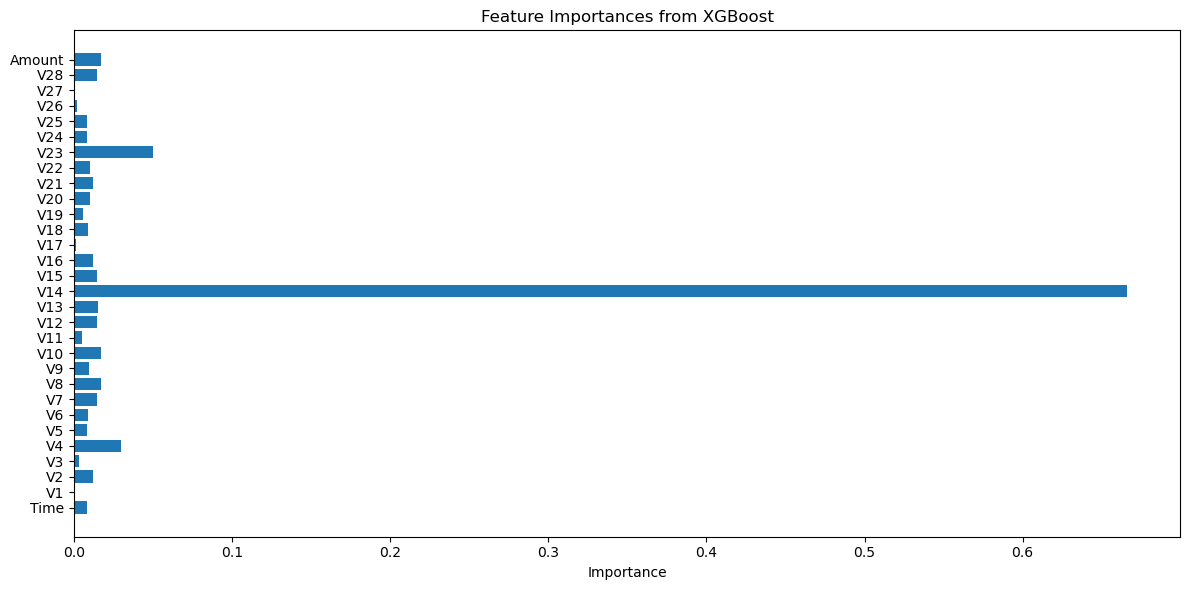

In [106]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = model.feature_importances_
features = X_train.columns

# Plot
plt.figure(figsize=(12, 6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importances from XGBoost')
plt.tight_layout()
plt.show()

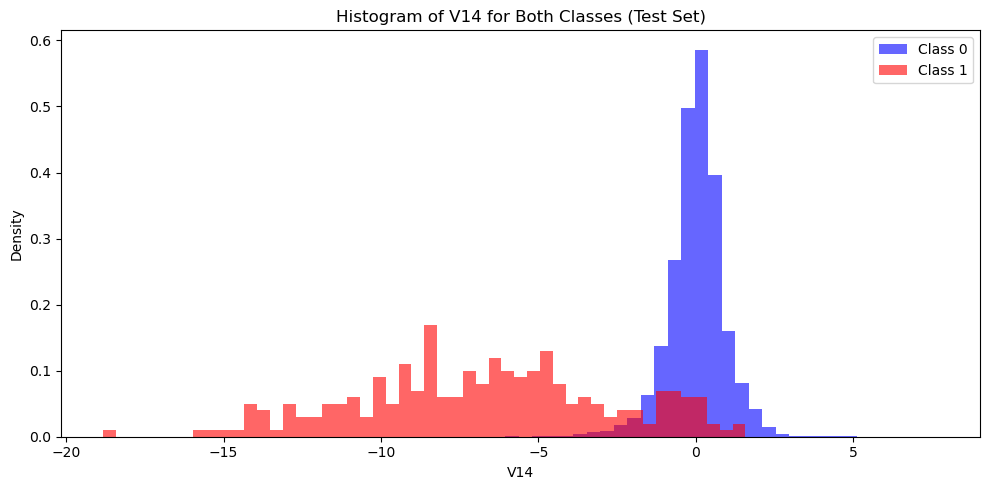

In [107]:
plt.figure(figsize=(10, 5))
plt.hist(df_test[df_test['Class'] == 0]['V14'], bins=50, alpha=0.6, label='Class 0', color='blue', density=True)
plt.hist(df_test[df_test['Class'] == 1]['V14'], bins=50, alpha=0.6, label='Class 1', color='red', density=True)
plt.xlabel('V14')
plt.ylabel('Density')
plt.title('Histogram of V14 for Both Classes (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

[0.35434934 0.35434934 0.35434934 ... 0.6245091  0.6336687  0.6452854 ]
[0.35443196 0.35443196 0.35434934 ... 0.35434934 0.35434934 0.35434934]


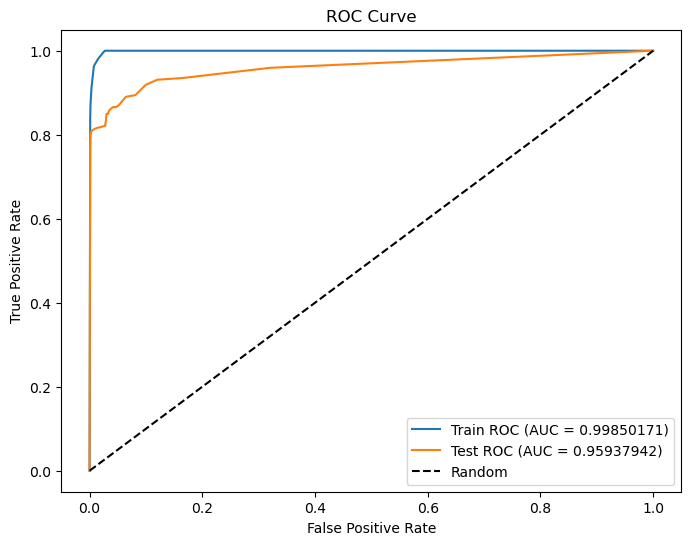

In [108]:
from sklearn.metrics import roc_curve, auc

# plot roc and calculate auc

import matplotlib.pyplot as plt

# Predict probabilities
y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]

print(y_train_pred)
print(y_test_pred)

# ROC curve and AUC for train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
auc_test = auc(fpr_test, tpr_test)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.8f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.8f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [109]:
# Predict probabilities for train set
y_scores_train = model.predict_proba(X_train)[:, 1]

# Compute precision-recall curve and area under curve for train set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_scores_train)
ap_train = average_precision_score(y_train, y_scores_train)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Test PR Curve (AP = {ap:.4f})')
plt.plot(recall_train, precision_train, label=f'Train PR Curve (AP = {ap_train:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


NameError: name 'precision_recall_curve' is not defined

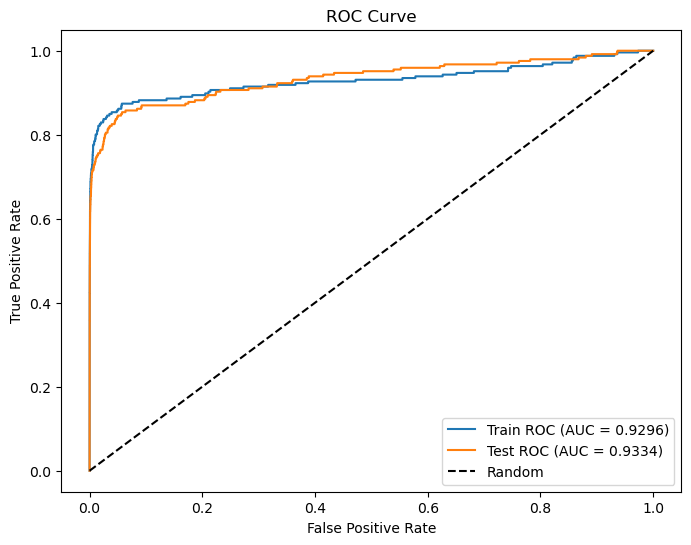

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# plot roc and calculate auc

import matplotlib.pyplot as plt

# Predict probabilities
y_train_pred = abs(X_train.V17)
y_test_pred = abs(X_test.V17)

# ROC curve and AUC for train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for test
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
auc_test = auc(fpr_test, tpr_test)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.4f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

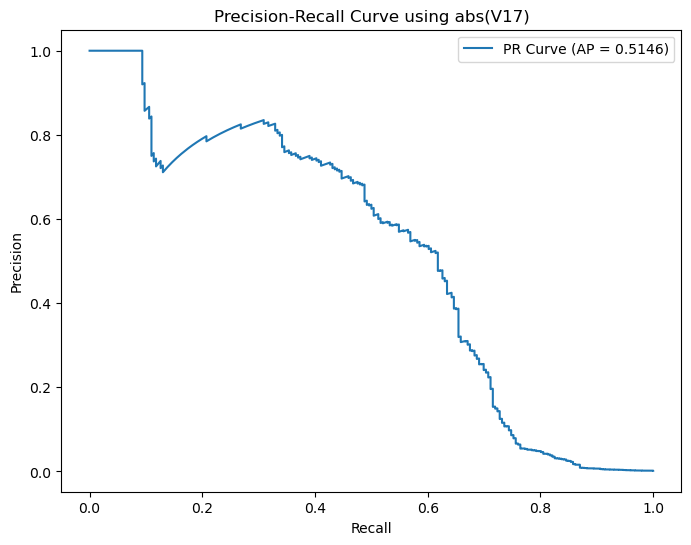

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

import matplotlib.pyplot as plt

# Use abs(V17) as prediction scores
y_scores_v17 = abs(X_test['V17'])

precision_v17, recall_v17, _ = precision_recall_curve(y_test, y_scores_v17)
ap_v17 = average_precision_score(y_test, y_scores_v17)

plt.figure(figsize=(8, 6))
plt.plot(recall_v17, precision_v17, label=f'PR Curve (AP = {ap_v17:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve using abs(V17)')
plt.legend()
plt.show()